# Chapter 14. 모델 성능 향상시키기




In [12]:
import sys
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

print(f"python: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"sklearn: {sklearn.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"tensorflow: {tf.__version__}")

python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy: 1.25.2
pandas: 1.5.3
sklearn: 1.2.2
matplotlib: 3.7.1
seaborn: 0.13.1
tensorflow: 2.15.0


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/taehojo/deeplearning/master/data/wine.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 38ms/step - loss: 17.3817 - accuracy: 0.2522 - val_loss: 13.4919 - val_accuracy: 0.2377
Epoch 2/50
8/8 [=

In [5]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9408
Test accuracy: 0.9407692551612854


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1: saving model to ./data/model/all/01-0.8777.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9262.hdf5

Epoch 3: saving model to ./data/model/a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to ./data/model/all/04-0.9346.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9377.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9331.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9354.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9362.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9369.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9377.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9392.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9377.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9385.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9400.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9400.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9400.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9362.hdf5

Epoch 18: saving model to ./data/model/all/18-0.9423.hdf5

Epoch 19: saving model to ./data/model/all/19-0.9400.hdf5

Epoch 20: saving model to ./data/model/all/20-0.9385.hdf5

Ep

In [8]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1362 - accuracy: 0.9485
Test accuracy: 0.9484615325927734


In [9]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

In [10]:
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.120504,0.957403,0.127215,0.948462
1,0.115734,0.956890,0.125796,0.952308
2,0.114640,0.957916,0.125275,0.955385
3,0.114369,0.961509,0.121239,0.957692
4,0.111474,0.960996,0.123046,0.957692


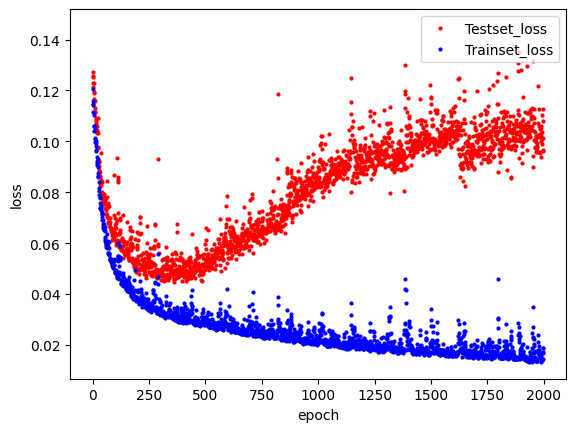

In [11]:
y_vloss=hist_df['val_loss']

y_loss=hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="./data/model/Ch14-4-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 76ms/step - loss: 1.7678 - accuracy: 0.3959 - val_loss: 0.4985 - val_accuracy: 0.7508
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.5279 - accuracy: 0.7619 - val_loss: 0.5422 - val_accuracy: 0.7654
Epoch 3/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5047 - accuracy: 0.7939 - val_loss: 0.4416 - val_accuracy: 0.8108
Epoch 4/2000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 14ms/step - loss: 0.3735 - accuracy: 0.8329 - val_loss: 0.2964 - val_accuracy: 0.8669
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2735 - accuracy: 0.8930 - val_loss: 0.2753 - val_accuracy: 0.9215
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.2753 - accuracy: 0.9230 - val_loss: 0.2566 - val_accuracy: 0.9185
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.2485 - accuracy: 0.9115 - val_loss: 0.2421 - val_accuracy: 0.9092
Epoch 8/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.2372 - accuracy: 0.9099 - val_loss: 0.2277 - val_accuracy: 0.9208
Epoch 9/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.2237 - accuracy: 0.9269 - val_loss: 0.2212 - val_accuracy: 0.9346
Epoch 10/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.2197 - accuracy: 0.9310 - val_loss: 0.2158 - val_accuracy: 0.9331
Epoch 11/2000
8/8 [======